# [Module 2.3] SKLearn XGBoost 훈련 및 추론

이 노트북은 아래와 같은 작업을 합니다.
- 훈련, 검증 데이터 로딩
- 훈련, 검증 데이터의 X, y 로 분리
- XGBoost 로 훈련
- 테스트 데이터 로딩 및 추론
- 모델 평가
- 피쳐 Importance 추출

In [1]:
import pandas as pd

In [2]:
%store -r te_pre_train_file
%store -r te_pre_test_file

## 훈련, 검증 데이터 로딩

In [3]:
train_df = pd.read_csv(te_pre_train_file, header=None, skiprows=1)

In [4]:
from IPython.display import display
display(train_df.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,3,29.99,10.96,9000.0,2640.0,1,4,10,2.169916,2.634373,2.081289,1.796930,1.701281,2.192347,1.633632,2.169544,2.273400,1.769943,2.201493
1,2,23.90,26.82,1500.0,14625.0,1,4,10,2.191720,2.217699,2.097592,2.210910,2.150079,2.194351,3.143455,2.205518,2.208892,3.195302,2.186005
2,4,249.90,17.59,610.0,4928.0,1,4,10,2.206125,2.005063,2.156330,2.133891,2.104642,2.163367,2.612756,2.165219,2.335182,2.488399,2.159966
3,4,89.90,17.51,1850.0,10764.0,1,4,10,2.250395,2.169863,2.092833,1.891487,2.171051,2.210502,2.625672,2.143322,2.668535,2.507481,2.144182
4,2,93.90,17.61,1200.0,12500.0,1,4,10,2.193097,2.230287,2.471783,2.141343,2.174232,2.212063,2.790628,2.153706,2.480000,2.463472,2.187718


## 훈련, 검증의 X, y 값의 분리

In [5]:
X_train, y_train = train_df.iloc[:,1:], train_df.iloc[:,0]
# X_val, y_val = val_df.iloc[:,1:], val_df.iloc[:,0]

## XGBoost 훈련

### XGBoost Parameters
- https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters

In [6]:
import xgboost as xgb

xgb_et = xgb.XGBClassifier(objective='multi:softmax',
                          colsample_bytree = 0.3,
                           max_depth = 10, alpha = 10, 
                           n_estimators = 200)
xgb_et.fit(X_train,y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=10,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [7]:
# xgb_et.score(X_val, y_val)

## 테스트 데이터 로딩 및 추론

In [8]:
test_df = pd.read_csv(te_pre_test_file, header=None,skiprows=1)
test_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,3,105.00,23.89,1000.0,7632.0,1,19,6,2.383450,2.248060,2.139111,2.071608,2.670790,2.215037,2.208833,2.192865,2.584195,2.652646,2.177167
1,0,99.97,15.80,650.0,9600.0,1,19,6,2.193994,2.039612,2.350234,1.957532,2.155151,2.150895,2.239534,2.174192,1.625256,1.816853,2.202125
2,3,76.99,23.34,1850.0,3000.0,1,19,6,2.182470,1.929809,2.073995,1.936101,2.147201,2.200517,2.640028,2.189071,2.184426,2.505653,2.175313
3,2,64.90,15.55,200.0,4752.0,1,19,6,2.187051,2.181686,2.068987,1.975613,2.170997,2.616731,2.612363,2.177088,2.439227,2.485332,2.173503
4,4,75.00,27.51,2550.0,31500.0,1,19,6,2.160452,2.227946,2.078289,1.956637,2.178010,2.191192,2.854430,2.189942,2.811362,2.840689,2.207974


In [9]:
X_test, y_test = test_df.iloc[:,1:], test_df.iloc[:,0]

In [10]:
prediction = xgb_et.predict(X_test)

## 모델 평가

In [11]:
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(y_test, prediction)
f1_score = f1_score(y_test, prediction, average='macro')
print("accuracy: %.2f%%" % accuracy)
print("f1_score: %.2f%%" % f1_score)

accuracy: 0.43%
f1_score: 0.42%


[[ 952  445  276   23    9]
 [ 363 1352 1574  745  128]
 [ 191  502 2200 1141  501]
 [  60  186  592 1024  306]
 [  18   60  259  261  268]]


<Figure size 432x288 with 0 Axes>

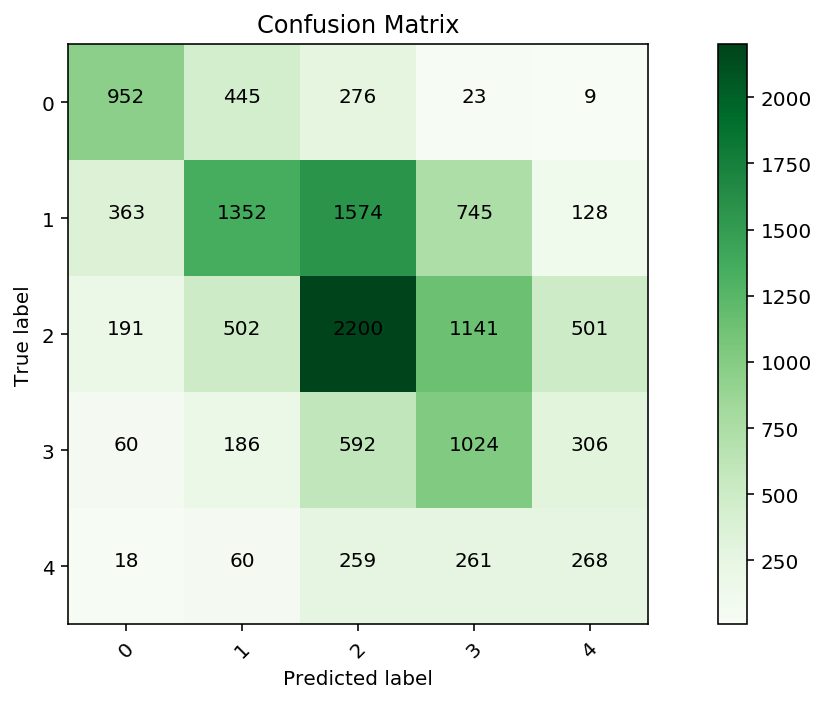

In [12]:
from utils import plot_conf_mat


from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

cm = confusion_matrix(y_true= y_test, y_pred= prediction)

plt.figure()
fig, ax = plt.subplots(figsize=(10,5))
plot_conf_mat(cm, 
              classes=['0','1', '2', '3', '4'], 
              title='Confusion Matrix')
plt.show()

## Feature Importance

In [13]:
test_col_df = pd.read_csv(te_pre_test_file)
features = test_col_df.columns[1:]
features


Index(['price', 'freight_value', 'product_weight_g', 'product_volume',
       'order_weekday', 'order_day', 'order_month',
       'te_product_id_mean_smoothed',
       'te_product_category_name_english_mean_smoothed',
       'te_seller_state_mean_smoothed', 'te_seller_city_mean_smoothed',
       'te_seller_zip_code_prefix_mean_smoothed',
       'te_customer_seller_city_mean_smoothed',
       'te_customer_seller_state_mean_smoothed',
       'te_customer_seller_zip_code_prefix_mean_smoothed',
       'te_customer_city_mean_smoothed', 'te_customer_state_mean_smoothed',
       'te_customer_zip_code_prefix_mean_smoothed'],
      dtype='object')

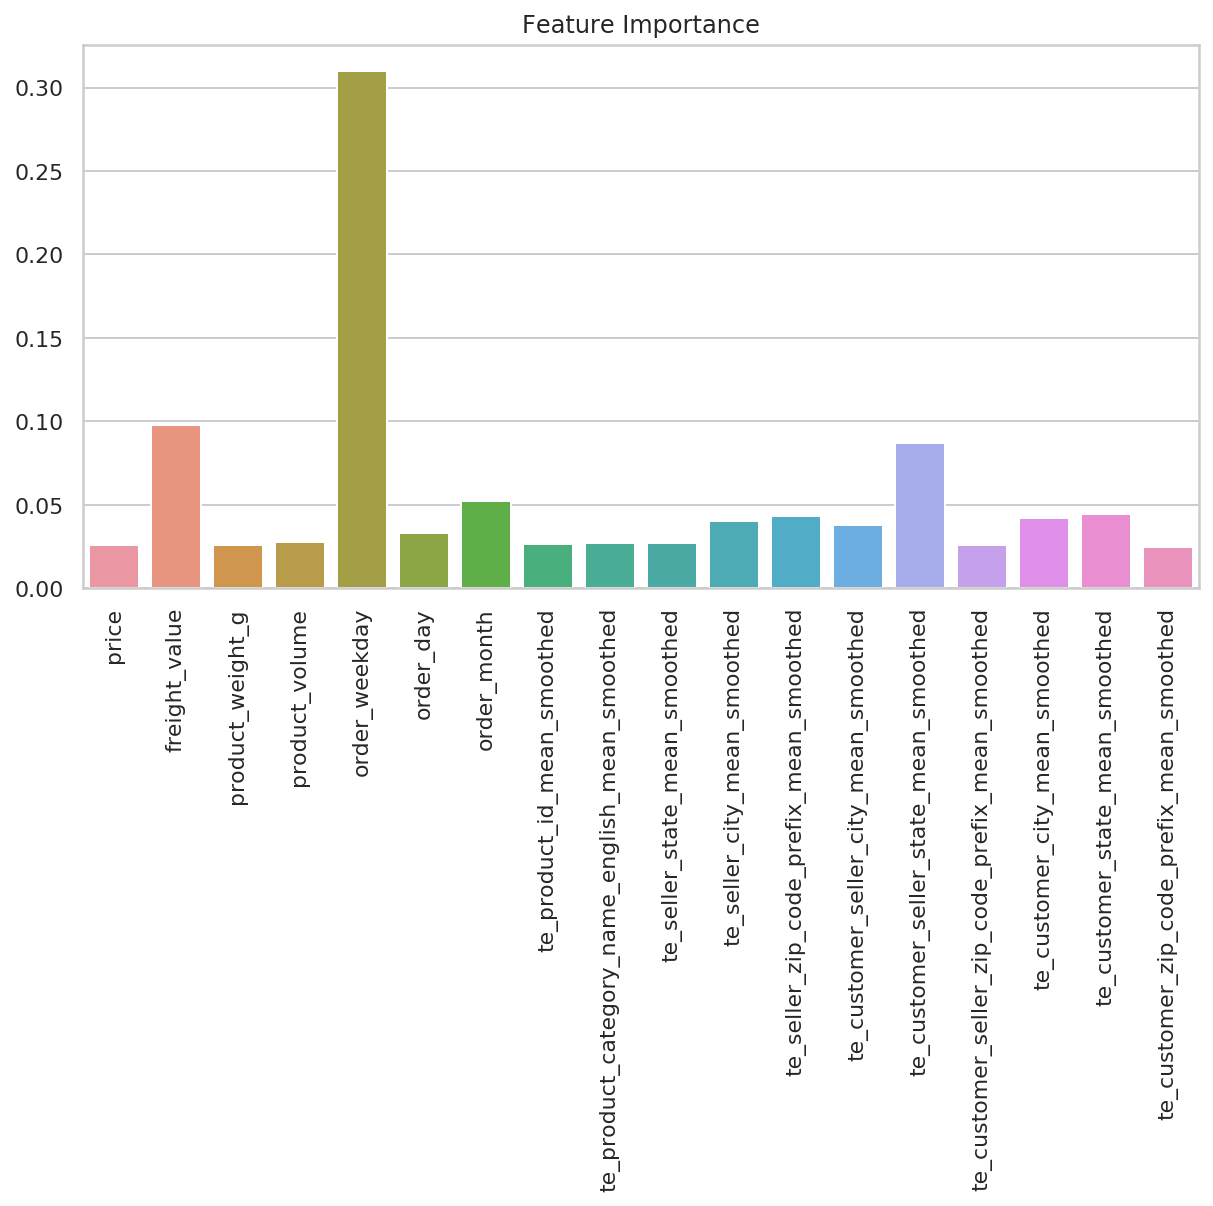

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")


test_col_df = pd.read_csv(te_pre_test_file)
features = test_col_df.columns[1:]
fea_importance = xgb_et.feature_importances_

f, ax = plt.subplots(figsize=(10,5))
plot = sns.barplot(x=features, y= fea_importance)
ax.set_title('Feature Importance')
plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
plt.show()